In [44]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
import tensorflow as tf
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [46]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [47]:
# df.head()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [49]:
df['date']= pd.to_datetime(df['date'], infer_datetime_format = True)

C:\Users\thaku\AppData\Local\Temp\ipykernel_11996\1020452881.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date']= pd.to_datetime(df['date'], infer_datetime_format = True)


In [ ]:
df.set_index('date')[['Appliances', 'lights', 'T1', 'RH_1','Visibility']].plot(subplots = True)

In [129]:
df_input = df[['Appliances', 'lights', 'T1', 'RH_1']]

In [130]:
df_input.describe()

,Appliances,lights,T1,RH_1
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739
std,102.524891,7.935988,1.606066,3.979299
min,10.000000,0.000000,16.790000,27.023333
25%,50.000000,0.000000,20.760000,37.333333
50%,60.000000,0.000000,21.600000,39.656667
75%,100.000000,0.000000,22.600000,43.066667
max,1080.000000,70.000000,26.260000,63.360000


In [131]:
df.query("Appliances > 500")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
11,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.000000,...,16.890000,45.290000,5.983333,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,8.827838
314,2016-01-13 21:20:00,520,0,19.600000,41.530000,19.133333,40.900000,19.133333,42.860000,19.633333,...,16.700000,40.090000,2.900000,756.733333,88.666667,5.000000,36.333333,1.233333,13.360604,13.360604
392,2016-01-14 10:20:00,550,10,18.700000,43.433333,18.390000,42.090000,19.260000,42.526667,18.700000,...,16.890000,46.526667,2.033333,748.766667,94.333333,5.333333,40.000000,1.233333,46.261497,46.261497
393,2016-01-14 10:30:00,690,10,18.790000,43.766667,18.500000,42.060000,19.320000,43.145000,18.700000,...,16.890000,46.400000,2.100000,748.800000,94.000000,5.000000,40.000000,1.250000,25.351780,25.351780
394,2016-01-14 10:40:00,620,10,18.790000,43.693333,18.566667,41.726667,19.693333,44.860000,18.760000,...,16.890000,46.260000,2.166667,748.833333,93.666667,4.666667,40.000000,1.266667,7.742551,7.742551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19586,2016-05-26 17:20:00,600,0,24.390000,44.066667,25.264286,37.528571,26.972500,39.042500,24.700000,...,22.700000,43.590000,20.833333,756.000000,45.333333,2.000000,40.000000,8.466667,9.560651,9.560651
19587,2016-05-26 17:30:00,520,0,24.390000,43.366667,25.060000,37.120000,27.166667,39.126667,24.666667,...,22.700000,43.590000,20.900000,755.950000,45.500000,2.000000,40.000000,8.600000,14.604373,14.604373
19684,2016-05-27 09:40:00,580,0,23.633333,47.226667,24.814000,43.472000,26.166667,40.500000,24.500000,...,22.890000,46.433333,15.900000,756.166667,79.333333,1.666667,61.000000,12.266667,27.740214,27.740214
19685,2016-05-27 09:50:00,660,0,23.760000,47.693333,25.497143,42.595714,26.033333,40.693333,24.500000,...,22.890000,46.290000,16.100000,756.183333,78.666667,1.333333,61.000000,12.333333,4.105907,4.105907


In [132]:
## there are outliers maybe

In [133]:
scaler = MinMaxScaler()

In [134]:
data_scaled = scaler.fit_transform(df_input)

In [135]:
data_scaled

array([[0.04672897, 0.42857143, 0.32734952, 0.56618659],
       [0.04672897, 0.42857143, 0.32734952, 0.54132648],
       [0.03738318, 0.42857143, 0.32734952, 0.53050179],
       ...,
       [0.24299065, 0.14285714, 0.91974657, 0.53866618],
       [0.38317757, 0.14285714, 0.91974657, 0.54949087],
       [0.39252336, 0.14285714, 0.91974657, 0.53875791]])

In [136]:
features = data_scaled ##first col has appliances and rest other 
target = data_scaled[:,0] #first column only # appliance is input as well as output

In [137]:
data_scaled

array([[0.04672897, 0.42857143, 0.32734952, 0.56618659],
       [0.04672897, 0.42857143, 0.32734952, 0.54132648],
       [0.03738318, 0.42857143, 0.32734952, 0.53050179],
       ...,
       [0.24299065, 0.14285714, 0.91974657, 0.53866618],
       [0.38317757, 0.14285714, 0.91974657, 0.54949087],
       [0.39252336, 0.14285714, 0.91974657, 0.53875791]])

In [138]:
TimeseriesGenerator(features, target, length = 2,sampling_rate =1,batch_size = 1)[0]
#length = 2 means 2 inputs are given that is 2 rows which has 20 min data 
# and sampling rate 1 ensures that 1 ourput for each of 2 inputs 

# this geneartor was for example genuiine one is stated later

(array([[[0.04672897, 0.42857143, 0.32734952, 0.56618659],
         [0.04672897, 0.42857143, 0.32734952, 0.54132648]]]),
 array([0.03738318]))

In [139]:
## these are 2 rows which are input and third one is the prediction

In [140]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.20,random_state=123, shuffle = False)
## shuffle is false since otherwise while taking out the train and test data we would be shuffling and changing the order
## but since here sequence matters we dont want to do that

In [141]:
x_train.shape

(15788, 4)

In [142]:
x_test.shape

(3947, 4)

In [143]:
win_length = 720 # 10 min data for 1 row 720 gives 5 days of data
batch_size = 32 # these nunoer of input would be given at once to our model
num_features = 4
train_generator = TimeseriesGenerator(x_train,y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length = win_length , sampling_rate =1  , batch_size = batch_size )

In [144]:
win_length

720

In [145]:
x, y = train_generator[0]
x.shape, y.shape

((32, 720, 4), (32,))

In [146]:
train_generator[0][1]
## 32 target columns 

array([0.06542056, 0.13084112, 0.34579439, 0.26168224, 0.24299065,
       0.38317757, 0.25233645, 0.27102804, 0.31775701, 0.24299065,
       0.51401869, 1.        , 0.69158879, 0.35514019, 0.31775701,
       0.30841121, 0.26168224, 0.20560748, 0.10280374, 0.09345794,
       0.08411215, 0.09345794, 0.11214953, 0.12149533, 0.09345794,
       0.08411215, 0.08411215, 0.09345794, 0.09345794, 0.1682243 ,
       0.41121495, 0.18691589])

In [147]:
len(train_generator[0][1]), len(test_generator[0][1])

(32, 32)

In [148]:
test_generator[0][0]

array([[[0.3364486 , 0.        , 0.48574446, 0.30923768],
        [0.54205607, 0.        , 0.48574446, 0.3055683 ],
        [0.28971963, 0.        , 0.48574446, 0.30455921],
        ...,
        [0.08411215, 0.        , 0.58078141, 0.24428951],
        [0.10280374, 0.        , 0.58078141, 0.23942758],
        [0.06542056, 0.        , 0.58078141, 0.23227227]],

       [[0.54205607, 0.        , 0.48574446, 0.3055683 ],
        [0.28971963, 0.        , 0.48574446, 0.30455921],
        [0.28037383, 0.14285714, 0.48574446, 0.30290799],
        ...,
        [0.10280374, 0.        , 0.58078141, 0.23942758],
        [0.06542056, 0.        , 0.58078141, 0.23227227],
        [0.07476636, 0.        , 0.58078141, 0.20851298]],

       [[0.28971963, 0.        , 0.48574446, 0.30455921],
        [0.28037383, 0.14285714, 0.48574446, 0.30290799],
        [0.23364486, 0.        , 0.47870468, 0.29933034],
        ...,
        [0.06542056, 0.        , 0.58078141, 0.23227227],
        [0.07476636, 0.      

In [149]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length,num_features), return_sequences = True))
#return_Sequences = True, would give hidden sequences for each input

# return_sequences=True: This means that the LSTM will return the full sequence of outputs for each input sequence.
# Specifically, for each time step in the input sequence, the LSTM produces an output. 
# This is useful when you want to pass the output of the LSTM layer to another recurrent layer or 
# when you need the outputs for each time step (for example, in sequence-to-sequence models).

In [150]:
model.add(tf.keras.layers.LeakyReLU(alpha= 0.5))

In [151]:
model.add(tf.keras.layers.LSTM(128, return_sequences = True))

In [152]:
model.add(tf.keras.layers.LeakyReLU(alpha= 0.5))
model.add(tf.keras.layers.Dropout(0.3))

In [153]:
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
# here return seq is false since we want one representation out of it
# we dont want one rep out of each neuron
# if we do the later then we would have to flatten the layer
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [154]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 720, 128)          0         
                                                                 
 lstm_17 (LSTM)              (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 720, 128)          0         
                                                                 
 dropout_10 (Dropout)        (None, 720, 128)          0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [155]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min')
model.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam(), metrics = [tf.metrics.MeanAbsoluteError()])
history = model.fit(train_generator, epochs = 50, validation_data = test_generator, shuffle = False, callbacks = [early_stopping])

Epoch 1/50
471/471 [==============================] - 503s 1s/step - loss: 0.0081 - mean_absolute_error: 0.0495 - val_loss: 0.0063 - val_mean_absolute_error: 0.0347
Epoch 2/50
471/471 [==============================] - 476s 1s/step - loss: 0.0066 - mean_absolute_error: 0.0430 - val_loss: 0.0059 - val_mean_absolute_error: 0.0410
Epoch 3/50
471/471 [==============================] - 477s 1s/step - loss: 0.0046 - mean_absolute_error: 0.0350 - val_loss: 0.0043 - val_mean_absolute_error: 0.0348
Epoch 4/50
471/471 [==============================] - 543s 1s/step - loss: 0.0042 - mean_absolute_error: 0.0326 - val_loss: 0.0046 - val_mean_absolute_error: 0.0402
Epoch 5/50
471/471 [==============================] - 516s 1s/step - loss: 0.0041 - mean_absolute_error: 0.0317 - val_loss: 0.0043 - val_mean_absolute_error: 0.0380


In [156]:
x_batch, y_batch = train_generator[0]  # Get the first batch
print(x_batch.shape)  # Should be (batch_size, win_length, num_features)
print(y_batch.shape)  # Should be (batch_size, 1) since it's a single target


(32, 720, 4)
(32,)


In [157]:
## here we should have used validation set seprately we have not so checking final perfomance on the test set itself

In [159]:
model.evaluate_generator(test_generator, verbose = 0)

C:\Users\thaku\AppData\Local\Temp\ipykernel_11996\1828663309.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.004318874794989824, 0.03796793520450592]

In [160]:
predictions = model.predict_generator(test_generator)

C:\Users\thaku\AppData\Local\Temp\ipykernel_11996\2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [ ]:
predictions.shape() # number of output less than window size since for lat window no output

In [161]:
y_test # would be scaled values

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [162]:
x_test

array([[0.3364486 , 0.        , 0.48574446, 0.30923768],
       [0.54205607, 0.        , 0.48574446, 0.3055683 ],
       [0.28971963, 0.        , 0.48574446, 0.30455921],
       ...,
       [0.24299065, 0.14285714, 0.91974657, 0.53866618],
       [0.38317757, 0.14285714, 0.91974657, 0.54949087],
       [0.39252336, 0.14285714, 0.91974657, 0.53875791]])

In [ ]:
x_test[:]

In [163]:
x_test[:,1:][win_length:]
#rows taken from 720 and forward

array([[0.        , 0.58078141, 0.20851298],
       [0.14285714, 0.58078141, 0.18282726],
       [0.        , 0.58078141, 0.18466196],
       ...,
       [0.14285714, 0.91974657, 0.53866618],
       [0.14285714, 0.91974657, 0.54949087],
       [0.14285714, 0.91974657, 0.53875791]])

In [165]:
df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])], axis =1)
# here we are removing the actual first attricute and append our prediciions in place

In [166]:
rev_trans = scaler.inverse_transform(df_pred)
# min max reversed

In [167]:
rev_trans

array([[ 78.37220423,   0.        ,  22.29      ,  34.6       ],
       [ 96.28392637,  10.        ,  22.29      ,  33.66666667],
       [126.02643587,   0.        ,  22.29      ,  33.73333333],
       ...,
       [ 39.12474783,  10.        ,  25.5       ,  46.59666667],
       [202.49356389,  10.        ,  25.5       ,  46.99      ],
       [245.12073532,  10.        ,  25.5       ,  46.6       ]])

In [168]:
# this was the original datafreme before train test
df_final = df_input[predictions.shape[0]*-1:]
# -1 helps to take from last

In [169]:
df_final.count()

Appliances    3227
lights        3227
T1            3227
RH_1          3227
dtype: int64

In [170]:
df_final['pred_value'] = rev_trans[:,0]

C:\Users\thaku\AppData\Local\Temp\ipykernel_11996\866575972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred_value'] = rev_trans[:,0]


<Axes: >

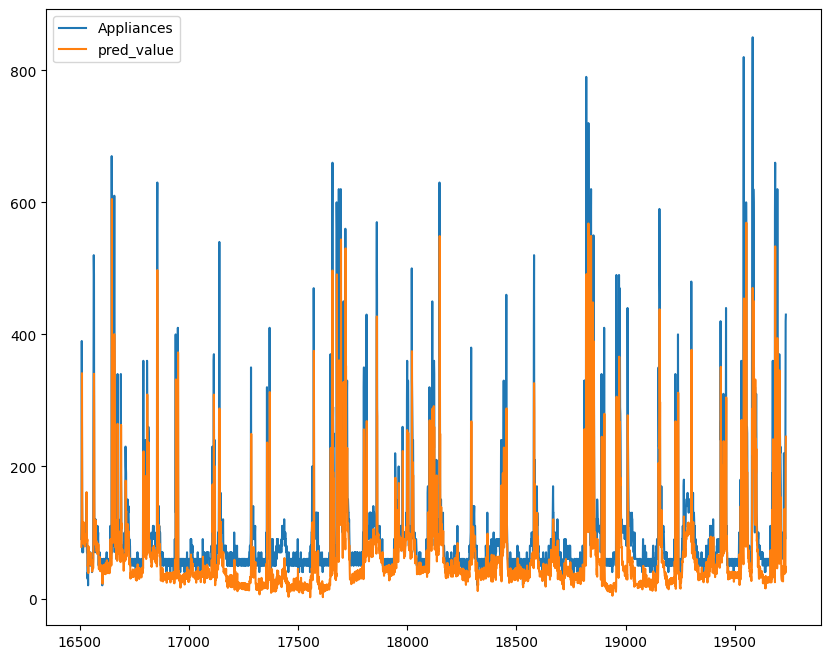

In [171]:
df_final[['Appliances','pred_value']].plot()